# Task 1:

In [1]:
# all tensorflow api is accessible through this
import tensorflow as tf        
# to visualize the resutls
import matplotlib.pyplot as plt 
# 70k mnist dataset that comes with the tensorflow container
from tensorflow.examples.tutorials.mnist import input_data

from tqdm import tqdm_notebook

mnist = input_data.read_data_sets("data/fashion", one_hot=True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


test accuracy is : 0.7895
test cost is : 8674.48


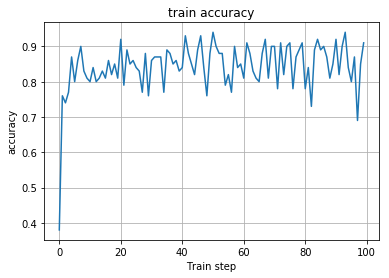

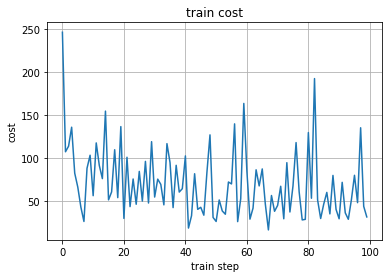

In [21]:
# BATCH_SIZE = 100
# print("The number of traninig examples are: " + str(mnist.train.num_examples))

# with tf.Session() as sess:

#     # initialize
#     sess.run(init)
#     for i in range(iterations): ##Is it meaningful
#         #load batch of images and correct answers
#         batch_X, batch_Y = mnist.train.next_batch(BATCH_SIZE)
#         #print(batch_Y.dtype) #dtype is 64!!
#         train_data={X: batch_X, Y: batch_Y}

#         #train
#         sess.run(train_step, feed_dict=train_data)

#         if i%100==0:
#             a,c = sess.run([accuracy,cross_entropy], feed_dict=train_data)
#             print("val accuracy is " + str(a))
#             print("val cost function is " + str(c))

    
#     print("Test results:")
#     test_data = {X:mnist.test.images, 
#                  Y:mnist.test.labels}
#     a,c = sess.run([accuracy,cross_entropy],feed_dict=test_data)
#     print("test accuracy is " + str(a))
#     print("test cost function is " + str(c))

# parameters
learningRate = 0.005
adamLearningRate = 0.005

# 1. Define Variables and Placeholders
X = tf.placeholder(tf.float32,[None,784])
Y = tf.placeholder(tf.float32,[None,10])
# 2. Define the model
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
init = tf.global_variables_initializer()

X = X / 255.0 - 0.5
# XX = tf.reshape(X,[-1,784])
Y_ = tf.nn.softmax(tf.add(tf.matmul(X, W), b))

# 3. Define the loss function  
cross_entropy = -tf.reduce_sum(Y*tf.log(Y_))
# cross_entropy = tf.train.cross_entropy(Y, Y_)

# 4. Define the accuracy 
is_correct = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))

# 5. Define an optimizer
optimizer = tf.train.GradientDescentOptimizer(learningRate)
# optimizer = tf.train.AdamOptimizer(0.001) #Errors TODO
train_step = optimizer.minimize(cross_entropy)

sess = tf.Session()
sess.run(init)
def training_step(i, update_train_data):

    ####### actual learning 
    # reading batches of 100 images with 100 labels
    batch_X, batch_Y = mnist.train.next_batch(100)
    # the backpropagation training step
    sess.run(train_step, feed_dict={X: batch_X, Y: batch_Y})
    
    ####### evaluating model performance for printing purposes
    # evaluation used to later visualize how well you did at a particular time in the training
    train_a = []
    train_c = []
    test_a = []
    test_c = []
    if update_train_data:
        a, c = sess.run([accuracy, cross_entropy], feed_dict={X: batch_X, Y: batch_Y})
        train_a.append(a)
        train_c.append(c)
    
    return (train_a, train_c)


# 6. Train and test the model, store the accuracy and loss per iteration

train_a = []
train_c = []
test_a = []
test_c = []

training_iter = 10000
epoch_size = 100
for i in range(training_iter):
    train = False
    if i % epoch_size == 0:
        train = True
    a, c = training_step(i, train)
    train_a += a
    train_c += c

test_a, test_c = sess.run([accuracy, cross_entropy], feed_dict={X: mnist.test.images, Y: mnist.test.labels})

print("test accuracy is : " + str(test_a))
print("test cost is : " + str(test_c))

    
# 7. Plot and visualise the accuracy and loss

# accuracy training vs testing dataset
plt.plot(train_a)
plt.grid(True)
plt.ylabel('accuracy')
plt.xlabel('Train step')
plt.title('train accuracy')
plt.show()

# loss training vs testing dataset
plt.plot(train_c)
plt.grid(True)
plt.ylabel('cost')
plt.xlabel('train step')
plt.title('train cost')
plt.show()

# Task 2

In [25]:
%matplotlib inline

def training(activation_type = 1):
    #Placeholders
    X = tf.placeholder(tf.float32, [None, 784])
    Y_ = tf.placeholder(tf.float32, [None, 10])

    #Variables

    W1 = tf.Variable(tf.truncated_normal([784,200],stddev=0.1))
    B1 = tf.Variable(tf.zeros([200]))

    W2 = tf.Variable(tf.truncated_normal([200,100],stddev=0.1))
    B2 = tf.Variable(tf.zeros([100]))

    W3 = tf.Variable(tf.truncated_normal([100,60],stddev=0.1))
    B3 = tf.Variable(tf.zeros([60]))

    W4 = tf.Variable(tf.truncated_normal([60,30],stddev=0.1))
    B4 = tf.Variable(tf.zeros([30]))

    W5 = tf.Variable(tf.truncated_normal([30,10],stddev=0.1))
    B5 = tf.Variable(tf.zeros([10]))
    init = tf.global_variables_initializer()

    def relu(x, w, b):
        return tf.nn.relu(tf.add(tf.matmul(x, w), b))

    def sigmoid(x, w, b):
        return tf.nn.sigmoid(tf.add(tf.matmul(x, w), b))

    def selectOne(x,w,b,flag):
        if flag==1:
            return relu(x,w,b)
        else:
            return sigmoid(x,w,b)

    def model(activation_type=1):
        #Define the model
        Y1 = selectOne(X,W1,B1,activation_type)
        Y2 = selectOne(Y1,W2,B2,activation_type)
        Y3 = selectOne(Y2,W3,B3,activation_type)
        Y4 = selectOne(Y3,W4,B4,activation_type)

        Y = tf.matmul(Y4,W5)+B5
        
        return Y
    
    Y = model(activation_type=activation_type)
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Y,labels = Y_))
    #Define the loss function
    # cross_entropy = -tf.reduce_sum(Y_*tf.log(Y))
    is_correct = tf.equal(tf.argmax(Y,1),tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
    # Define an optimizer

    optimizer = tf.train.GradientDescentOptimizer(0.5)
    # optimizer = tf.train.AdamOptimizer(0.000001) #Errors TODO
    train_step = optimizer.minimize(cross_entropy)

    # initialize
    sess = tf.Session()
    sess.run(init)


    training_iter = 10000
    validation_step = 100
    print("The number of traninig examples are: " + str(mnist.train.num_examples))

    train_a = []
    train_c = []
    test_a = []
    test_c = []

    for i in tqdm_notebook(range(training_iter)): ##Is it meaningful
        #load batch of images and correct answers
        batch_X, batch_Y = mnist.train.next_batch(batch_size=100)
        #print(batch_Y.dtype) #dtype is 64!!
        train_data={X: batch_X, Y_: batch_Y}

        #train
        sess.run(train_step,feed_dict=train_data)

        if i % validation_step == 0:
            #success
            a,c = sess.run([accuracy,cross_entropy],feed_dict=train_data)
    #         print("train accuracy is " + str(a))
    #         print("train cost function is " + str(c))
            train_a.append(a)
            train_c.append(c)

            test_data = {X:mnist.test.images, Y_:mnist.test.labels}
            a,c = sess.run([accuracy,cross_entropy],feed_dict=test_data)
            test_a.append(a)
            test_c.append(c)
            
    return train_a, test_a, train_c, test_c

In [26]:
train_a_sig, test_a_sig, train_c_sig, test_c_sig = training(activation_type=0)
train_a_relu, test_a_relu, train_c_relu, test_c_relu = training(activation_type=1)

The number of traninig examples are: 55000


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))


The number of traninig examples are: 55000


HBox(children=(IntProgress(value=0, max=10000), HTML(value='')))

In [27]:
print("Max accuracy [train_a_sig] is : "+str(max(train_a_sig)))
print("Max accuracy [test_a_sig] is : "+str(max(test_a_sig)))

print("Max accuracy [train_a_relu] is : "+str(max(train_a_relu)))
print("Max accuracy [test_a_relu] is : "+str(max(test_a_relu)))

Max accuracy [train_a_sig] is : 0.96
Max accuracy [test_a_sig] is : 0.8673
Max accuracy [train_a_relu] is : 1.0
Max accuracy [test_a_relu] is : 0.8851


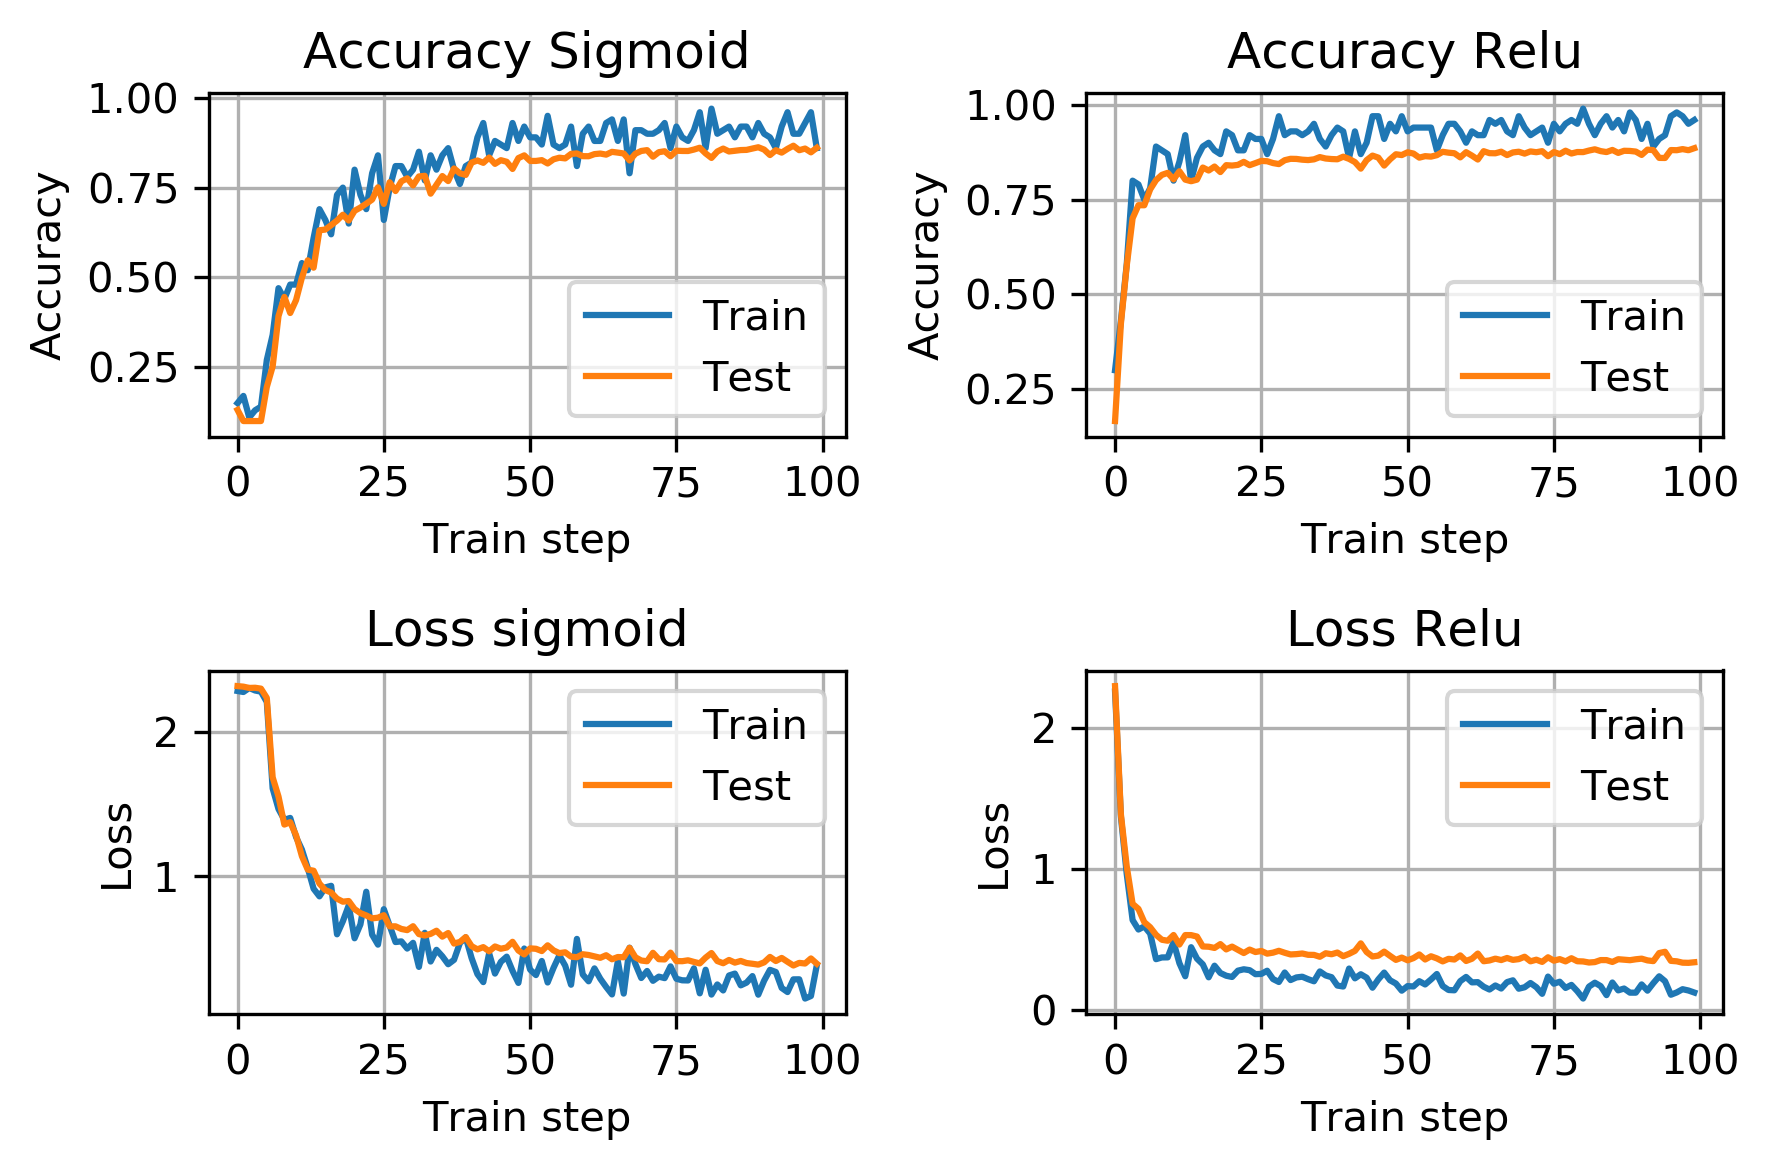

In [15]:
plt.rcParams['figure.dpi']= 300
fig, ax = plt.subplots(nrows=2, ncols=2)

# accuracy training vs testing dataset
plt.subplot(2, 2, 1)
plt.plot(train_a_sig, label='Train')
plt.plot(test_a_sig, label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Train step')
plt.title('Accuracy Sigmoid')
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(train_a_relu, label='Train')
plt.plot(test_a_relu, label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Train step')
plt.title('Accuracy Relu')
plt.grid(True)



# loss training vs testing dataset
plt.subplot(2, 2, 3)
plt.plot(train_c_sig, label='Train')
plt.plot(test_c_sig, label='Test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Train step')
plt.title('Loss sigmoid')
plt.grid(True)


plt.subplot(2, 2, 4)
plt.plot(train_c_relu, label='Train')
plt.plot(test_c_relu, label='Test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Train step')
plt.title('Loss Relu')
plt.grid(True)

plt.tight_layout()
plt.show()

Max accuracy [train] is : 0.98
Max accuracy [test] is : 0.885


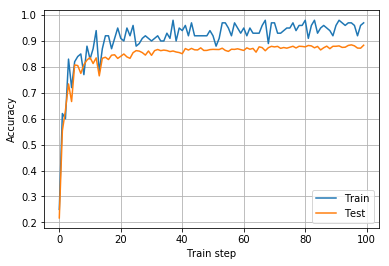

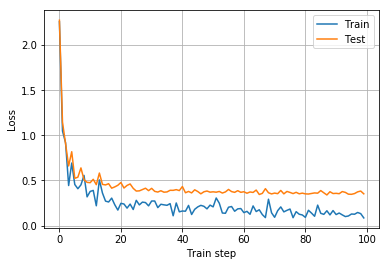

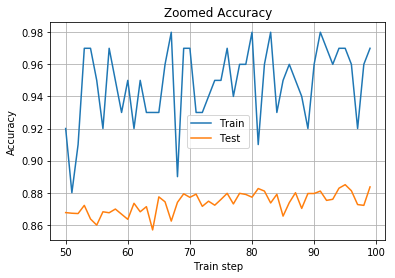

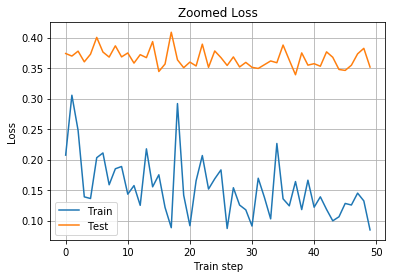

finish


In [6]:
# Zoom in on the tail of the plots
zoom_point = 50
x_range = range(zoom_point,training_iter // validation_step)
plt.plot(x_range, train_a[zoom_point:], label='Train')
plt.plot(x_range, test_a[zoom_point:], label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Train step')
plt.title('Zoomed Accuracy')
plt.grid(True)
plt.show()

plt.plot(train_c[zoom_point:], label='Train')
plt.plot(test_c[zoom_point:], label='Test')
plt.grid(True)
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Train step')
plt.title('Zoomed Loss')
plt.show()

# Questions

## 1
 - Sigmoid:
     - Max accuracy [train] is : 0.96
     - Max accuracy [test] is : 0.8652
        
 - Relu:
     - Max accuracy [train] is : 0.98
     - Max accuracy [test] is : 0.885

## 2
 - Yes, there is. Relu converges faster, as it doesn't face gradient vanishing problem (slope~=0).

## 3
 - We want to predict probability that a sample belongs to each class (10 class in this assignment).

## 4
- Normalization, Shuffle



# Task 3

In [28]:
%matplotlib inline

def training(activation_type = 1):
    lr = ?
    #Placeholders
    pkeep = tf.placeholder(tf.float32)
    X = tf.placeholder(tf.float32, [None, 784])
    Y_ = tf.placeholder(tf.float32, [None, 10])

    #Variables

    W1 = tf.Variable(tf.truncated_normal([784,200],stddev=0.1))
    B1 = tf.Variable(tf.zeros([200]))

    W2 = tf.Variable(tf.truncated_normal([200,100],stddev=0.1))
    B2 = tf.Variable(tf.zeros([100]))

    W3 = tf.Variable(tf.truncated_normal([100,60],stddev=0.1))
    B3 = tf.Variable(tf.zeros([60]))

    W4 = tf.Variable(tf.truncated_normal([60,30],stddev=0.1))
    B4 = tf.Variable(tf.zeros([30]))

    W5 = tf.Variable(tf.truncated_normal([30,10],stddev=0.1))
    B5 = tf.Variable(tf.zeros([10]))

    init = tf.global_variables_initializer()

    def relu(x, w, b, pkeep):
        Y = tf.nn.relu(tf.add(tf.matmul(x, w), b))
        return tf.nn.dropout(Y,pkeep)

    def sigmoid(x, w, b, pkeep):
        Y = tf.nn.sigmoid(tf.add(tf.matmul(x, w), b))
        return tf.nn.dropout(Y,pkeep)

    def selectOne(x, w, b, pkeep, flag):
        if flag==1:
            return relu(x,w,b,pkeep)
        else:
            return sigmoid(x,w,b,pkeep)

    def model(activation_type=1):
        #Define the model
        Y1d = selectOne(X,W1,B1,pkeep,activation_type)
        Y2d = selectOne(Y1d,W2,B2,pkeep,activation_type)
        Y3d = selectOne(Y2d,W3,B3,pkeep,activation_type)
        Y4d = selectOne(Y3d,W4,B4,pkeep,activation_type)
        Y = tf.matmul(Y4d,W5)+B5
        
        return Y
    
    Y = model(activation_type=activation_type)
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = Y,labels = Y_))
    #Define the loss function
    # cross_entropy = -tf.reduce_sum(Y_*tf.log(Y))
    is_correct = tf.equal(tf.argmax(Y,1),tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
    # Define an optimizer

    optimizer = tf.train.GradientDescentOptimizer(0.5)
    # optimizer = tf.train.AdamOptimizer(0.000001) #Errors TODO
    train_step = optimizer.minimize(cross_entropy)

    # initialize
    sess = tf.Session()
    sess.run(init)


    training_iter = 10000
    validation_step = 100
    print("The number of traninig examples are: " + str(mnist.train.num_examples))

    train_a = []
    train_c = []
    test_a = []
    test_c = []

    for i in tqdm_notebook(range(training_iter)): ##Is it meaningful
        #load batch of images and correct answers
        batch_X, batch_Y = mnist.train.next_batch(batch_size=100)
        #print(batch_Y.dtype) #dtype is 64!!
        train_data={X: batch_X, Y_: batch_Y}

        #train
        sess.run(train_step,feed_dict=train_data)

        if i % validation_step == 0:
            #success
            a,c = sess.run([accuracy,cross_entropy],feed_dict=train_data)
    #         print("train accuracy is " + str(a))
    #         print("train cost function is " + str(c))
            train_a.append(a)
            train_c.append(c)

            test_data = {X:mnist.test.images, Y_:mnist.test.labels}
            a,c = sess.run([accuracy,cross_entropy],feed_dict=test_data)
            test_a.append(a)
            test_c.append(c)
            
    return train_a, test_a, train_c, test_c

SyntaxError: invalid syntax (<ipython-input-28-aced7f4cddff>, line 4)

In [ ]:
train_a_sig, test_a_sig, train_c_sig, test_c_sig = training(activation_type=0)
train_a_relu, test_a_relu, train_c_relu, test_c_relu = training(activation_type=1)

plt.rcParams['figure.dpi']= 300
fig, ax = plt.subplots(nrows=2, ncols=2)

# accuracy training vs testing dataset
plt.subplot(2, 2, 1)
plt.plot(train_a_sig, label='Train')
plt.plot(test_a_sig, label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Train step')
plt.title('Accuracy Sigmoid')
plt.grid(True)


plt.subplot(2, 2, 2)
plt.plot(train_a_relu, label='Train')
plt.plot(test_a_relu, label='Test')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Train step')
plt.title('Accuracy Relu')
plt.grid(True)



# loss training vs testing dataset
plt.subplot(2, 2, 3)
plt.plot(train_c_sig, label='Train')
plt.plot(test_c_sig, label='Test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Train step')
plt.title('Loss sigmoid')
plt.grid(True)


plt.subplot(2, 2, 4)
plt.plot(train_c_relu, label='Train')
plt.plot(test_c_relu, label='Test')
plt.legend()
plt.ylabel('Loss')
plt.xlabel('Train step')
plt.title('Loss Relu')
plt.grid(True)

plt.tight_layout()
plt.show()

# Task 4

In [4]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.datasets import fashion_mnist
from keras import optimizers

batch_size = 128
num_classes = 10
epochs = 1

# input image dimensions
img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(4, kernel_size=(5, 5),strides = (1,1),activation='relu',input_shape=input_shape,padding="same",use_bias=True))
model.add(Conv2D(8, kernel_size=(5, 5),strides = (1,2),activation='relu',padding="same"))
model.add(Conv2D(12, kernel_size=(4, 4),strides = (1,2),activation='relu',padding="same"))
model.add(Dense(200, activation='relu')) #Dense
model.add(Dense(num_classes, activation='softmax')) #ReadOut

sgd = optimizers.SGD(lr=0.01, decay=1e-6)
adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Flatten())
# model.add(Dropout(0.5))

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


TypeError: __init__() missing 1 required positional argument: 'filters'

# Task 5

In [2]:
from itertools import product

#Create hyperparameter space
learning_rates = [0.001,0.0001,0.00001]
dropouts = [0.5,0.7]
optimizers = ['gradient','adam']

for op,lr,dropout in product(optimizers,learning_rates,dropouts):
    print([op,lr,dropout])
#     Execute them

['gradient', 0.001, 0.5]
['gradient', 0.001, 0.7]
['gradient', 0.0001, 0.5]
['gradient', 0.0001, 0.7]
['gradient', 1e-05, 0.5]
['gradient', 1e-05, 0.7]
['adam', 0.001, 0.5]
['adam', 0.001, 0.7]
['adam', 0.0001, 0.5]
['adam', 0.0001, 0.7]
['adam', 1e-05, 0.5]
['adam', 1e-05, 0.7]
